In [1]:
import qcodes as qc
import numpy as np
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_export import load_by_id
from qcodes.dataset.sqlite.database import connect
from qdev_wrappers.fitting.fitters import CosFitter, ExpDecayFitter, MinimumFitter
from qdev_wrappers.fitting.fit_by_id import fit_by_id
from qdev_wrappers.fitting.plotting import plot_fit_by_id
from qcodes import new_experiment

/Users/natalie/Documents/PhD/Qdev/QdevWrappers/qdev_wrappers/logger.py:16: UserWarning: The logger.py of qdev-wrappers is deprecated and will be removed soon. Please use the logger of QCoDeS instead.
  warnings.warn('The logger.py of qdev-wrappers is deprecated and will be '


In [2]:
transmon_db_path = qc.config.user['transmon_db_location']
transmon_db_connection = connect(transmon_db_path)

## Data in the transmon database (for reference)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>description</th>
      <th>run_id</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>rabis_frequency</td>
      <td>1</td>
    </tr>
    <tr>
      <td>t1</td>
      <td>2</td>
    </tr>
    <tr>
      <td>ramsey_frequency</td>
      <td>3</td>
    </tr>
    <tr>
      <td>t2*</td>
      <td>4</td>
    </tr>
    <tr>
      <td>readout_fidelity</td>
      <td>5</td>
    </tr>
    <tr>
      <td>spectroscopy</td>
      <td>6</td>
    </tr>
    <tr>
      <td>resonator_power</td>
      <td>7</td>
    </tr>
    <tr>
      <td>readout_fidelity_cavity_power_frequency</td>
      <td>8</td>
    </tr>
  </tbody>
</table>

## Fit by ID

Now that you know what a fitter is (if you don't go through the 'Introducing the Fitter' notebook) you might want to use the helper functions to fit to a competed dataset:

- **fit_by_id** 
    -  *Args*:
      - 'data_run_id'
      - 'fitter'
      - 'dependent_parameter_name' (the name of the measured parameter)
      - 'experiment_parameters' (then name(s) of the independent parameter(s)). 
    - *Kwargs*:
      - 'plot'(whether to plot results, default True)
      - 'save_plots' (if plot, whether to save plots, default True)
      - 'show_variance' (if plot, whether show variance, default True)
      - 'show_initial_values' (if plot, whether show initial values, default True)
      - Any other kwargs are passed to the fit function of the fitter

Let's start by fitting without generating any plots

In [3]:
rabi_fitter = CosFitter()
t1_fitter = ExpDecayFitter()
minimum_fitter = MinimumFitter()

/Users/natalie/Documents/PhD/Qdev/Qcodes/qcodes/utils/deprecate.py:59: QCoDeSDeprecationWarning: The function <_save_val> is deprecated. Use "`cache.set`" as an alternative.
  issue_deprecation_warning(f'{t} <{n}>', reason, alternative)


### Fitting to a 1d

Start by choosing a 1d T1 dataset where we want to fit an exponential decay to it.

results #2@/Users/natalie/Documents/PhD/Qdev/QdevWrappers/examples/fitting/../transmons_data/transmons.db
---------------------------------------------------------------------------------------------------------
alazar_controller_ch_0_m_records_drive_readout_delay - numeric
alazar_controller_ch_0_m_records_data - numeric


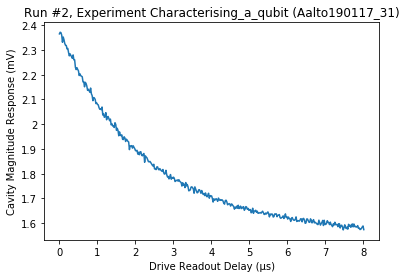

In [4]:
print(load_by_id(2, conn=transmon_db_connection))
ax, clb = plot_by_id(2, conn=transmon_db_connection)

In [5]:
t1_fit_run_id, ax, clb = fit_by_id(
    2,
    t1_fitter,
    'alazar_controller_ch_0_m_records_data',
    'alazar_controller_ch_0_m_records_drive_readout_delay',
    source_conn=transmon_db_connection,
    plot=False)

Starting experimental run with id: 7. 


In [6]:
load_by_id(t1_fit_run_id)

results #7@/Users/natalie/Documents/PhD/Qdev/QdevWrappers/examples/fitting/../fitting.db
----------------------------------------------------------------------------------------
T_initial_value - numeric
success - numeric
a - numeric
c - numeric
c_initial_value - numeric
T - numeric
a_initial_value - numeric
T_variance - numeric
a_variance - numeric
c_variance - numeric

So we can see this gives us a dataset with all the fitter parameters saved. Yay.

### Fitting to a 2d

What about if there was some other variable in the dataset...? Let's choose a Rabi measuement where we want to fit a cosine at each frequency.

results #1@/Users/natalie/Documents/PhD/Qdev/QdevWrappers/examples/fitting/../transmons_data/transmons.db
---------------------------------------------------------------------------------------------------------
rs_qubit_frequency - numeric
alazar_controller_pulse_duration - numeric
alazar_controller_ch_0_m_records_data - numeric
alazar_controller_ch_0_p_records_data - numeric


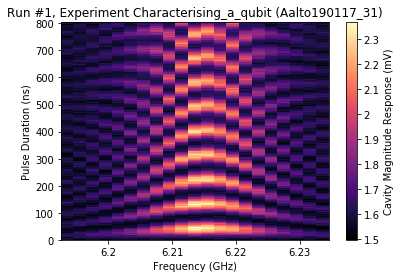

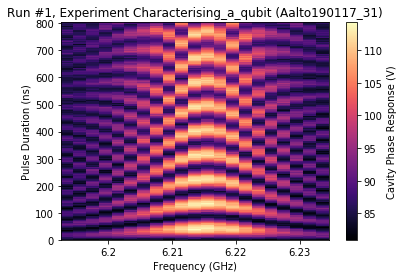

In [7]:
print(load_by_id(1, conn=transmon_db_connection))
ax, clb = plot_by_id(1, conn=transmon_db_connection)

In [8]:
rabi_fit_run_id, ax, clb = fit_by_id(
    1,
    rabi_fitter,
    'alazar_controller_ch_0_m_records_data',
    'alazar_controller_pulse_duration',
    source_conn=transmon_db_connection,
     plot=False)

Starting experimental run with id: 8. 


In [9]:
load_by_id(rabi_fit_run_id)

results #8@/Users/natalie/Documents/PhD/Qdev/QdevWrappers/examples/fitting/../fitting.db
----------------------------------------------------------------------------------------
rs_qubit_frequency - numeric
success - numeric
a - numeric
w - numeric
p - numeric
c - numeric
a_variance - numeric
w_variance - numeric
p_variance - numeric
c_variance - numeric
a_initial_value - numeric
w_initial_value - numeric
p_initial_value - numeric
c_initial_value - numeric

So this looks like it does the expected thing and add a column for the frequency. Let's for completeness also try out a different kind of fitter. We use the simple minimum fitter to track a cavity as a funciton of power.

results #7@/Users/natalie/Documents/PhD/Qdev/QdevWrappers/examples/fitting/../transmons_data/transmons.db
---------------------------------------------------------------------------------------------------------
rs_vna_S21_power - numeric
rs_vna_S21_S21_frequency - numeric
rs_vna_S21_trace - numeric


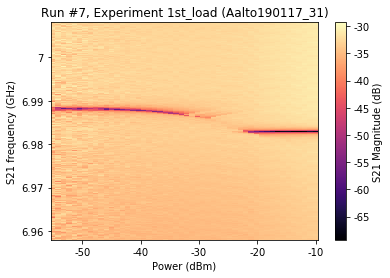

In [10]:
print(load_by_id(7, conn=transmon_db_connection))
ax, clb = plot_by_id(7, conn=transmon_db_connection)

In [11]:
min_fit_run_id, ax, clb = fit_by_id(
    7,
    minimum_fitter,
    'rs_vna_S21_trace',
    'rs_vna_S21_S21_frequency',
    source_conn=transmon_db_connection,
    plot=False)
load_by_id(min_fit_run_id)

Starting experimental run with id: 9. 


results #9@/Users/natalie/Documents/PhD/Qdev/QdevWrappers/examples/fitting/../fitting.db
----------------------------------------------------------------------------------------
rs_vna_S21_power - numeric
success - numeric
location - numeric
value - numeric

That also works :) Now lets check out plotting (if we had set the plot kwarg of fit_by_id to be True we would get exactly the same plots as below).

## Plot by ID

For 1d datasets a 1d plot will be generated with the data against the fit to the data. For 2d datasets a 2d heatmap of the fit result will be generated and a 1d plot for each of the fit parameters as a function of the 'setpoint' variable.

- **plot_fit_by_id** assumes a saved analysis dataset. Either make this with fit_by_id or check out the 'DIY fitting' notebook
    - *Args*:
      - 'fit_run_id'
    - *Kwargs*:
      - 'show_variance' (whether to plot variance, default True)
      - 'show_initial_values' (whether to plot the initial values, default True)
      - 'save_plots' (whether to save the plots generated, default True)
      - Any other kwargs are taken to be values of the setpoints

### Plotting a 1d 

Play with the kwargs to see how variance and initial_values are displayed and change plot_save to True to save the figure

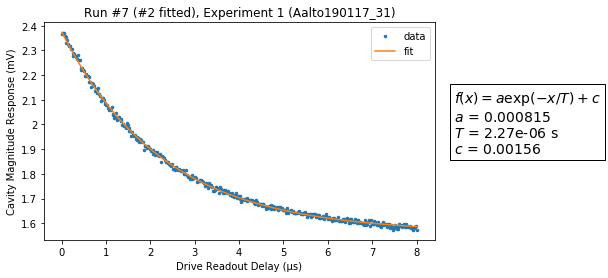

In [12]:
ax, clb = plot_fit_by_id(t1_fit_run_id,
                         show_initial_values=False,
                         show_variance=False,
                         source_conn=transmon_db_connection,
                         save_plots=False)

### Plotting a 2d

Again have aplay with the kwargs, things look a bit different here.

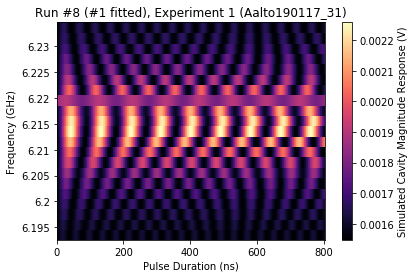

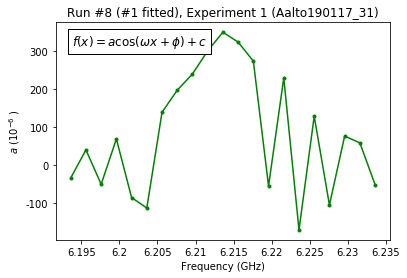

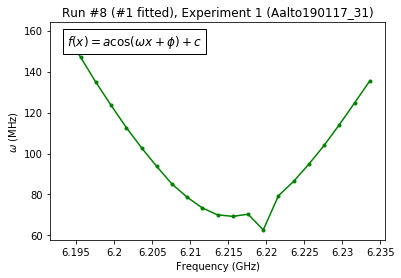

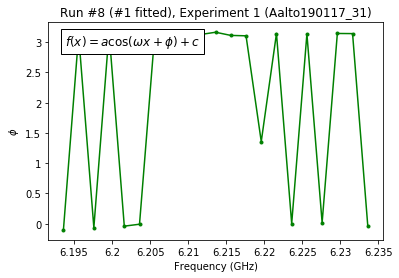

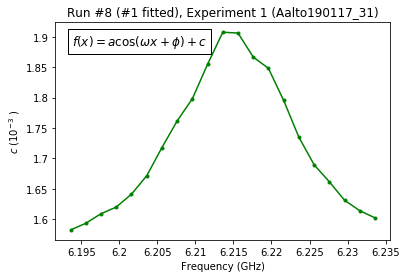

In [13]:
ax, clb = plot_fit_by_id(rabi_fit_run_id,
                         show_initial_values=False,
                         show_variance=False,
                         source_conn=transmon_db_connection,
                         save_plots=False)

And for the simple minimum 2d plot:

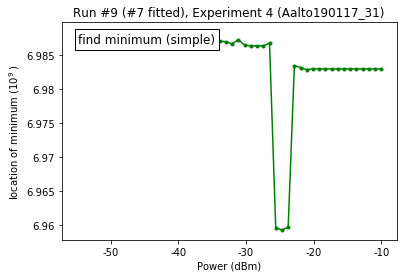

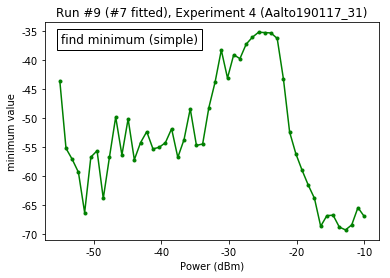

In [14]:
ax, clb = plot_fit_by_id(min_fit_run_id,
                         source_conn=transmon_db_connection,
                         save_plots=False)

If you want to see a 1d plot of the fit result vs the data at one of these points you can specify a setpoint value and it will plot the cut at the nearest point. Saving this will not overwrite the other plots as the setpoint value is included in the saved name.

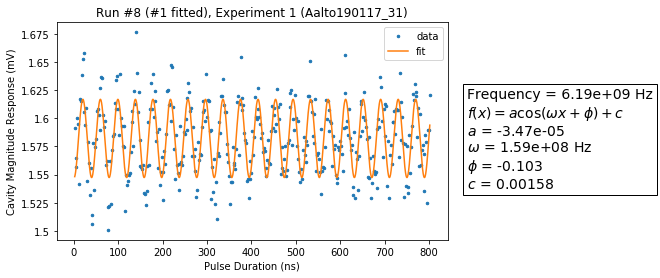

In [15]:
ax, clb = plot_fit_by_id(rabi_fit_run_id,
                         rs_qubit_frequency=6.215e9,
                         show_initial_values=False,
                         show_variance=False,
                         source_conn=transmon_db_connection,
                         save_plots=False)

## Just for fun comparison..
...here is how plot_by_id would handle these

Multi-dimensional data encountered. parameter T depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter T_initial_value depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter T_variance depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter a depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter a_initial_value depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter a_variance depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter c depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter c_initial_value depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter c_variance depends on 0 parameters, cannot plot that.
Multi-dimensional data encountered. parameter success depends on 0 parameters, cannot plot that.


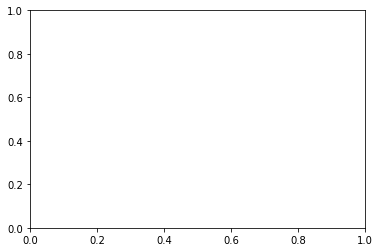

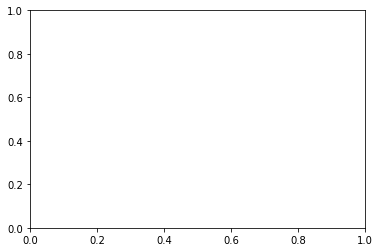

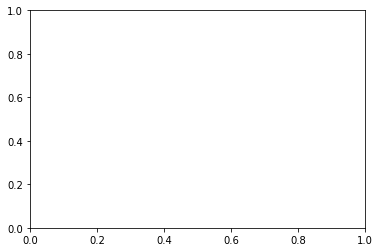

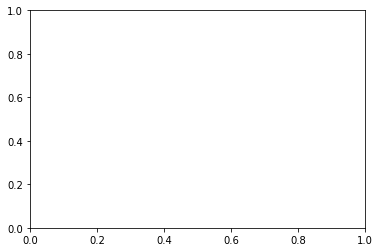

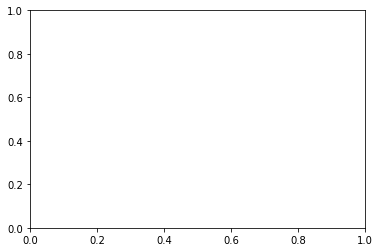

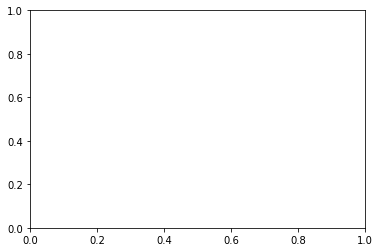

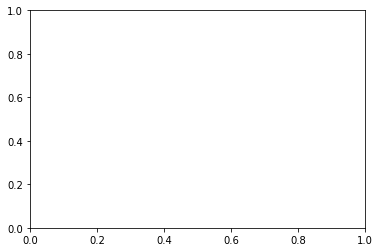

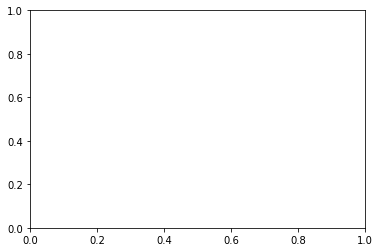

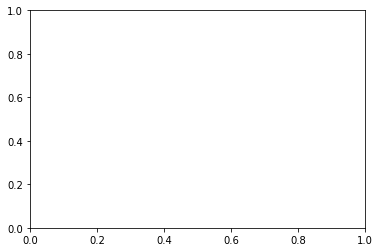

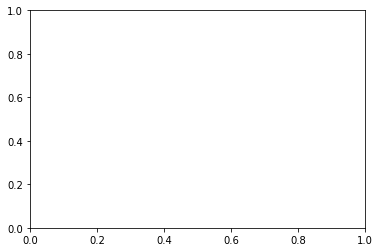

In [16]:
ax, clb = plot_by_id(t1_fit_run_id)

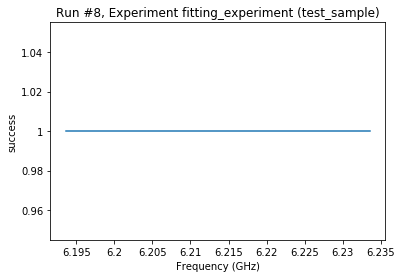

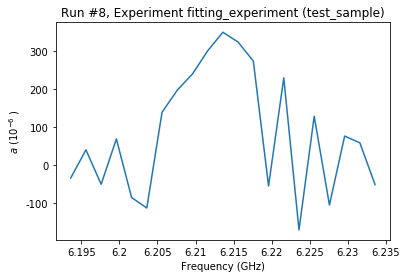

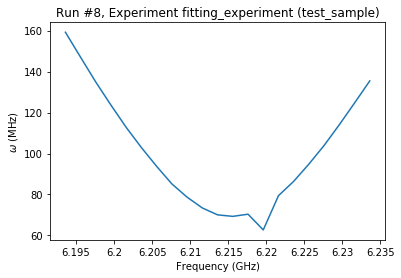

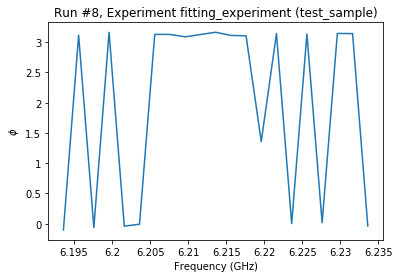

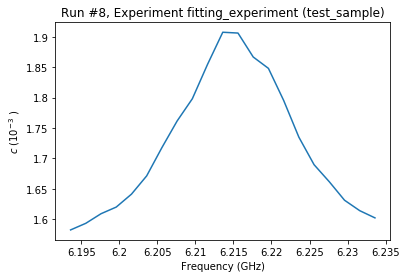

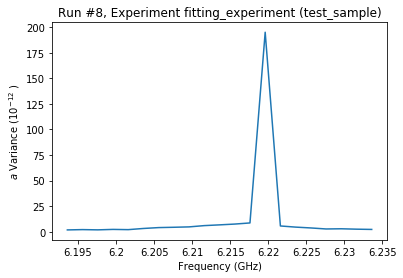

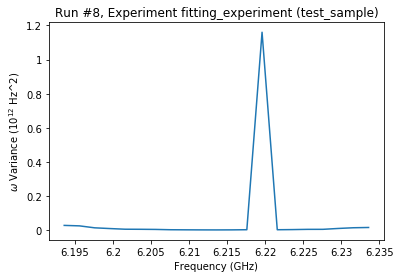

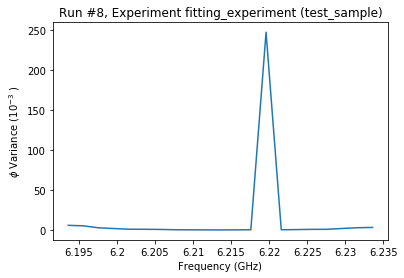

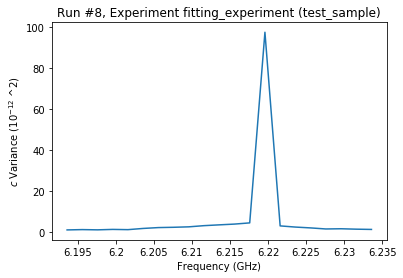

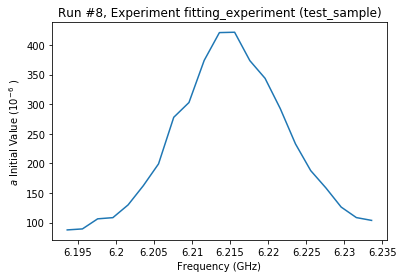

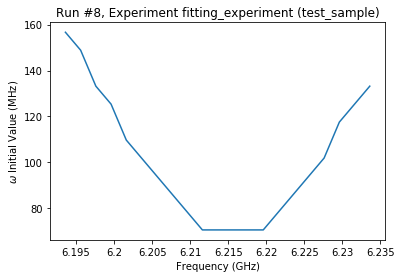

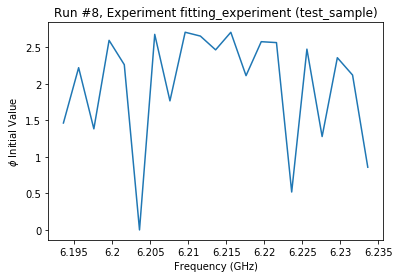

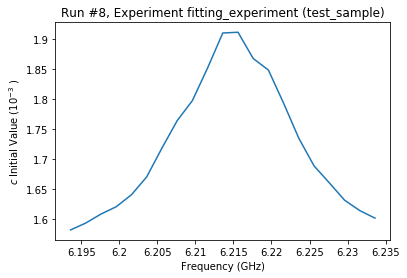

In [17]:
ax, clb = plot_by_id(rabi_fit_run_id)

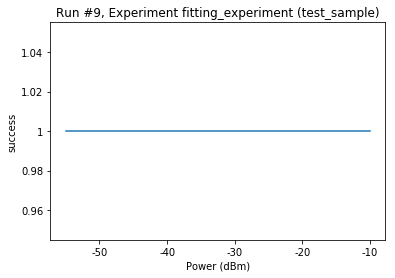

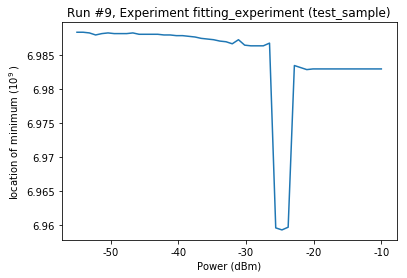

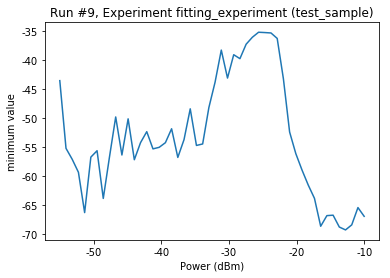

In [19]:
ax, clb = plot_by_id(min_fit_run_id)